In [ ]:
import io
import time
import itertools
import numpy as np
import sys
import pandas as pd
from google.colab import files
from sklearn import mixture
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.preprocessing import normalize
from scipy import linalg
from sklearn import mixture
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd /content/drive/My\ Drive/CS\ 4641

Mounted at /content/drive/
/content/drive/My Drive/CS 4641


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd /content/drive/My\ Drive/ML\ 4641

Mounted at /content/drive/
/content/drive/My Drive/ML 4641


In [ ]:
df = pd.read_csv('diabetes_cleaned_replaced.csv')
df = df.loc[:, df.columns != '0']
df = df.loc[:, df.columns != '1']
df = df.loc[:, df.columns != 'Unnamed: 0']
#df = df.iloc[0:]
print(df)
# Dataset is now stored in a Pandas Dataframe

          2    3     4    5    6    7     8  ...   38   39   40   41   42   43   44
0       0.0  0.0  10.0  1.0  1.0  7.0   3.0  ...  0.0  0.0  0.0  0.0  1.0  1.0  1.0
1       0.0  1.0  30.0  1.0  1.0  7.0   2.0  ...  0.0  0.0  0.0  0.0  1.0  1.0  0.0
2       0.0  1.0  40.0  1.0  1.0  7.0   1.0  ...  0.0  0.0  0.0  0.0  1.0  1.0  0.0
3       0.0  1.0  50.0  2.0  1.0  2.0   3.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  1.0
4       0.0  1.0  70.0  1.0  1.0  7.0   5.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  1.0
...     ...  ...   ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...
101761  0.0  1.0  50.0  1.0  3.0  7.0   5.0  ...  0.0  0.0  0.0  0.0  1.0  1.0  0.0
101762  1.7  1.0  50.0  1.0  6.0  7.0  13.0  ...  0.0  0.0  0.0  0.0  1.0  1.0  0.0
101763  0.0  1.0  10.0  1.0  7.0  7.0   1.0  ...  0.0  0.0  0.0  0.0  1.0  1.0  0.0
101764  0.4  0.0  70.0  2.0  1.0  1.0   4.0  ...  0.0  0.0  0.0  0.0  1.0  1.0  2.0
101765  0.0  0.0  40.0  3.0  1.0  1.0   4.0  ...  0.0  0.0  0.0  0.0  1.0  1

# Running PCA on Cleaned Dataset

In [ ]:
insulin_X = df.loc[:, df.columns != '36']
insulin_Y = df[['36']]
"""labels = np.array(['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id', 'time in hospital',	
          'num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient',	
          'diag_1','diag_2','diag_3','number_diagnoses','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
          'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
          'tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin',	'glimepiride-pioglitazone',	
          'metformin-rosiglitazone', 'metformin-pioglitazone','change','diabetesMed','readmitted']) """

div = np.sqrt(np.sum(insulin_X**2,axis=0))+(10**-32)
insulin_X = insulin_X / div

pca=PCA(n_components=32)

ins_fit = pca.fit_transform(insulin_X)
print(f"Retained Variance with {32} components: {np.sum(pca.explained_variance_ratio_[:32])}")

print(ins_fit, ins_fit.shape)





Retained Variance with 32 components: 0.9670509026943547
[[-5.38000828e-04 -6.21843455e-04  1.27306231e-04 ... -1.49468605e-03
  -2.00112425e-03 -1.00188845e-03]
 [-2.89463585e-04 -1.82874576e-03  1.76884612e-04 ... -1.57178939e-03
  -2.27023220e-03 -1.48051441e-03]
 [ 1.29525439e-03 -1.24443733e-03 -1.25077949e-04 ... -5.13003404e-04
  -1.69025919e-03 -1.40869358e-03]
 ...
 [-3.92484842e-04 -1.40304118e-03  9.66398023e-06 ... -6.74442092e-04
  -3.34212548e-03 -4.85678513e-03]
 [ 4.50446246e-04 -1.19252474e-04  2.20397929e-02 ...  4.16386698e-04
  -1.73231259e-03  1.02632712e-03]
 [ 2.98841482e-03 -1.91938326e-03 -5.37105227e-04 ... -4.75322363e-04
  -2.20436321e-03  2.97735412e-04]] (101766, 32)


# Passing Reduced Dataset Through Decision Tree Algorithm
Decision Tree for Predicting Insulin Levels

In [ ]:
runtimes = []
for i in range(5):
    start = time.time()
    x_train, x_test, y_train, y_test = train_test_split(ins_fit, insulin_Y, test_size =0.2)
    #tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
    #tree.fit(x_train, y_train, sample_weight=None, check_input=True, X_idx_sorted='deprecated')
    decisionTree = tree.DecisionTreeClassifier()
    decisionTree.fit(x_train, y_train)
    y_pred = decisionTree.predict(x_test)
    print("Accuracy for tree " + str(i) + ": ", metrics.accuracy_score(y_test, y_pred))
    depth = decisionTree.get_depth()     
    n_leaves = decisionTree.get_n_leaves()
    print("Depth: ", depth) 
    print("Number of leaves: ", n_leaves)
    end = time.time()
    runtimes.append(end - start)
    print("Runtime for Insulin Level DTs:", end - start)
print("Average Runtime for Insulin Level DTs:", np.mean(runtimes))

Accuracy for tree 0:  0.7272280632799449
Depth:  46
Number of leaves:  10285
Runtime for Insulin Level DTs: 4.932684898376465
Accuracy for tree 1:  0.7309619730765452
Depth:  50
Number of leaves:  10251
Runtime for Insulin Level DTs: 5.022917032241821
Accuracy for tree 2:  0.7278667583767319
Depth:  52
Number of leaves:  10235
Runtime for Insulin Level DTs: 4.974623680114746
Accuracy for tree 3:  0.7254593691657659
Depth:  50
Number of leaves:  10237
Runtime for Insulin Level DTs: 5.100909948348999
Accuracy for tree 4:  0.7337624054239953
Depth:  52
Number of leaves:  10216
Runtime for Insulin Level DTs: 5.0054943561553955
Average Runtime for Insulin Level DTs: 5.007325983047485


Depth:  10
Number of leaves:  75
Accuracy for tree 0:  0.736710228947627
Runtime for Insulin Level DTs with Leafnode Maximums : 2.432950019836426
Depth:  9
Number of leaves:  76
Accuracy for tree 1:  0.745258917166159
Runtime for Insulin Level DTs with Leafnode Maximums : 2.431100368499756
Depth:  9
Number of leaves:  77
Accuracy for tree 2:  0.7372506632602929
Runtime for Insulin Level DTs with Leafnode Maximums : 2.475630044937134
Depth:  10
Number of leaves:  78
Accuracy for tree 3:  0.7356784907143559
Runtime for Insulin Level DTs with Leafnode Maximums : 2.4556515216827393
Depth:  9
Number of leaves:  79
Accuracy for tree 4:  0.7373980544364744
Runtime for Insulin Level DTs with Leafnode Maximums : 2.4750876426696777
Depth:  10
Number of leaves:  80
Accuracy for tree 5:  0.7377419671808981
Runtime for Insulin Level DTs with Leafnode Maximums : 2.4558098316192627
Depth:  9
Number of leaves:  81
Accuracy for tree 6:  0.7383315318856244
Runtime for Insulin Level DTs with Leafnode Max

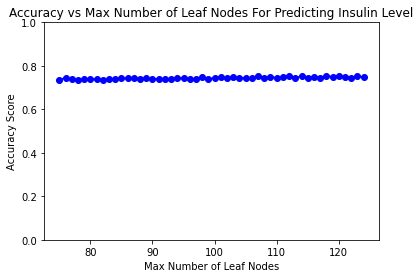

In [ ]:
leaf_nodes = [10, 25, 50, 75, 100, 200, 300, 400, 500, 1000, 2000, 4000, 8000, 12000, 16000, 20000, 24000, 28000]
accuracyArray = []
runtimes = []
list2 = list(range(75, 125))

for i in range(0, len(list2)):
    start = time.time()
    x_train, x_test, y_train, y_test = train_test_split(ins_fit, insulin_Y, test_size =0.2)
    decisionTree = tree.DecisionTreeClassifier(max_leaf_nodes=list2[i])
    decisionTree.fit(x_train, y_train)
    y_pred = decisionTree.predict(x_test)
    depth = decisionTree.get_depth()     
    n_leaves = decisionTree.get_n_leaves()
    print("Depth: ", depth) 
    print("Number of leaves: ", n_leaves) 
    print("Accuracy for tree " + str(i) + ": ", metrics.accuracy_score(y_test, y_pred))
    accuracyArray.append(metrics.accuracy_score(y_test, y_pred))
    end = time.time()
    runtimes.append(end - start)
    print("Runtime for Insulin Level DTs with Leafnode Maximums :", end - start)

print("Max accuracy: ", max(accuracyArray))
plt.plot(list2, accuracyArray,'bo-')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.xlabel('Max Number of Leaf Nodes')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Max Number of Leaf Nodes For Predicting Insulin Level')
print("Average Runtime for Insulin Level DTs with Leafnode Maximums :", np.mean(runtimes))

Decision Tree for Predicting Readmitted Liklihood

In [ ]:
readmitted_X = df.loc[:, df.columns != '44']
readmitted_Y = df.loc[:, '44']

pca=PCA(n_components=32)

read_fit = pca.fit_transform(readmitted_X)
print(f"Retained Variance with {32} components: {np.sum(pca.explained_variance_ratio_[:32])}")

print(ins_fit, ins_fit.shape)
runtimes = []
for i in range(5):
    start = time.time()
    x_train, x_test, y_train, y_test = train_test_split(read_fit, readmitted_Y, test_size =0.2)
    decisionTree = tree.DecisionTreeClassifier()
    decisionTree.fit(x_train, y_train)
    y_pred = decisionTree.predict(x_test)
    importanceVals = decisionTree.feature_importances_
    sortedImportanceValues = (np.argsort(-importanceVals))[:]
    print("Accuracy for tree " + str(i) + ": ", metrics.accuracy_score(y_test, y_pred))
    depth = decisionTree.get_depth()     
    n_leaves = decisionTree.get_n_leaves()
    print("Depth: ", depth) 
    print("Number of leaves: ", n_leaves)
    end = time.time()
    runtimes.append((end-start))
    print("Runtime for Readmission Liklihood DTs:", end - start)
print("Average Runtime for Readmission Liklihood DTs:", np.mean(runtimes))

Retained Variance with 32 components: 0.9999999918959578
[[-5.38000828e-04 -6.21843455e-04  1.27306231e-04 ... -1.49468605e-03
  -2.00112425e-03 -1.00188845e-03]
 [-2.89463585e-04 -1.82874576e-03  1.76884612e-04 ... -1.57178939e-03
  -2.27023220e-03 -1.48051441e-03]
 [ 1.29525439e-03 -1.24443733e-03 -1.25077949e-04 ... -5.13003404e-04
  -1.69025919e-03 -1.40869358e-03]
 ...
 [-3.92484842e-04 -1.40304118e-03  9.66398023e-06 ... -6.74442092e-04
  -3.34212548e-03 -4.85678513e-03]
 [ 4.50446246e-04 -1.19252474e-04  2.20397929e-02 ...  4.16386698e-04
  -1.73231259e-03  1.02632712e-03]
 [ 2.98841482e-03 -1.91938326e-03 -5.37105227e-04 ... -4.75322363e-04
  -2.20436321e-03  2.97735412e-04]] (101766, 32)
Accuracy for tree 0:  0.46045003439127447
Depth:  55
Number of leaves:  18014
Runtime for Readmission Liklihood DTs: 6.589923143386841
Accuracy for tree 1:  0.4653630735973273
Depth:  47
Number of leaves:  17987
Runtime for Readmission Liklihood DTs: 6.630641222000122
Accuracy for tree 2:  0.4

Depth:  4
Number of leaves:  5
Accuracy for tree:  0.5573842979266974
Runtime for Readmission Liklihood DTs with Leafnode Maximums : 1.9109060764312744
Depth:  4
Number of leaves:  6
Accuracy for tree:  0.5619534243883266
Runtime for Readmission Liklihood DTs with Leafnode Maximums : 1.714529275894165
Depth:  4
Number of leaves:  7
Accuracy for tree:  0.5575808194949395
Runtime for Readmission Liklihood DTs with Leafnode Maximums : 1.864912509918213
Depth:  5
Number of leaves:  8
Accuracy for tree:  0.5559595165569421
Runtime for Readmission Liklihood DTs with Leafnode Maximums : 2.1424200534820557
Depth:  6
Number of leaves:  9
Accuracy for tree:  0.5561560381251842
Runtime for Readmission Liklihood DTs with Leafnode Maximums : 2.16445255279541
Depth:  6
Number of leaves:  10
Accuracy for tree:  0.5634273361501425
Runtime for Readmission Liklihood DTs with Leafnode Maximums : 2.2065043449401855
Depth:  6
Number of leaves:  11
Accuracy for tree:  0.5595460351773607
Runtime for Readmiss

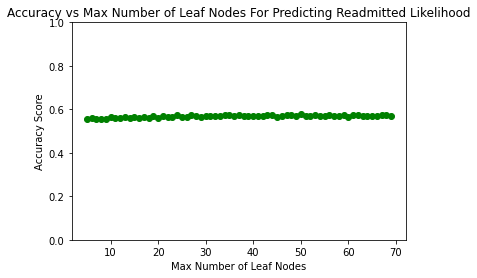

In [ ]:
labels = np.array(['race','gender','age','admission_type_id','discharge_disposition_id','admission_source_id', 'time in hospital',	
          'num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient',	
          'diag_1','diag_2','diag_3','number_diagnoses'])
leaf_nodes = [10, 25, 50, 75, 100, 200, 300, 400, 500, 1000, 2000, 4000, 8000, 12000, 16000, 20000, 24000, 28000]
accuracyArray = []
runtimes = []
list2 = list(range(5, 70))

for j in range(0, len(list2)):  
  start_loop = time.time()
  x_train, x_test, y_train, y_test = train_test_split(read_fit, readmitted_Y, test_size =0.2)
  decisionTree = tree.DecisionTreeClassifier(max_leaf_nodes=list2[j])
  decisionTree.fit(x_train, y_train)
  y_pred = decisionTree.predict(x_test)
  importanceVals = decisionTree.feature_importances_
  depth = decisionTree.get_depth()     
  n_leaves = decisionTree.get_n_leaves()
  accuracyArray.append(metrics.accuracy_score(y_test, y_pred))
  print("Depth: ", depth) 
  print("Number of leaves: ", n_leaves)
  print("Accuracy for tree: ", metrics.accuracy_score(y_test, y_pred))
  end_loop = time.time()
  runtimes.append(end_loop - start_loop)
  print("Runtime for Readmission Liklihood DTs with Leafnode Maximums :", end_loop - start_loop)

print("Max accuracy: ", max(accuracyArray))
plt.plot(list2, accuracyArray,'go-')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.xlabel('Max Number of Leaf Nodes')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Max Number of Leaf Nodes For Predicting Readmitted Likelihood')
print("Average Runtime for Readmission Liklihood DTs with Leafnode Maximums :", np.mean(runtimes))